In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("Genre Classification Dataset/train_data.txt",sep=":::",names=['movie','genre','description'],engine='python')

In [3]:
train_data

,movie,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [4]:
test_data = pd.read_csv("Genre Classification Dataset/test_data_solution.txt",sep=":::",names=['movie','genre','description'],engine='python')

In [5]:
test_data

,movie,genre,description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import string

stopwords=set(stopwords.words('english'))
stemmer=PorterStemmer()


In [7]:

def clean(text):
    text=re.sub(r'/W',' ',text)
    text=re.sub(r'http\+S',' ',text)
    tokens=word_tokenize(text.lower())
    stemmed_words=[stemmer.stem(token) for token in tokens if token.isalpha() and token not in stopwords]
    return " ".join(stemmed_words)
    

In [8]:
train_data['description']=train_data['description'].apply(clean)
test_data['description']=test_data['description'].apply(clean)

In [9]:
train_data

,movie,genre,description
1,Oscar et la dame rose (2009),drama,listen convers doctor parent oscar learn nobod...
2,Cupid (1997),thriller,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,film titl refer bodi ground zero also state na...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,nbc live sitcom center bonino concert singer l...
54211,Dead Girls Don't Cry (????),horror,next gener exploit sister kapa bay soror hous ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt comedi grow face fear freer or...
54213,Make Your Own Bed (1944),comedy,walter vivian live countri difficult time keep...


In [10]:
test_data

,movie,genre,description
1,Edgar's Lunch (1998),thriller,brane love life car apart job especi girlfrien...
2,La guerra de papá (1977),comedy,spain march quico naughti child three belong w...
3,Off the Beaten Track (2010),documentary,one year life albin famili shepherd north tran...
4,Meu Amigo Hindu (2015),drama,father die spoken brother year seriou cancer d...
5,Er nu zhai (1955),drama,known intern martial art superstar bruce lee a...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,cover multipl genr tale light dark antholog we...
54197,Der letzte Mohikaner (1965),western,alic cora munro attempt find father british of...
54198,Oliver Twink (2007),adult,movi year make oliv twist art dodger fagin lov...
54199,Slipstream (1973),drama,popular mysteri rock mike mallard askew broadc...


In [11]:
def barplot(data):
    genre_value_counts=data['genre'].value_counts()
    plt.figure(figsize=(12,8))
    genre_value_counts.plot(kind='bar')
    plt.title='Distribution of Movies Genre'
    plt.xlabel='Genre' 
    plt.ylabel='No. of Movies'
    plt.xticks(rotation=45)
    plt.show
    

In [12]:
train_data=train_data.drop(columns=['Unnamed: 0'],axis=1)
train_data.to_csv('cleaned_train.csv',index=False)

In [13]:
test_data=test_data.drop(columns=['Unnamed: 0'],axis=1)
test_data.to_csv('cleaned_test.csv',index=False)

In [14]:
#removing white trails

In [15]:
train_data['genre']=train_data['genre'].str.strip()
test_data['genre']=test_data['genre'].str.strip()

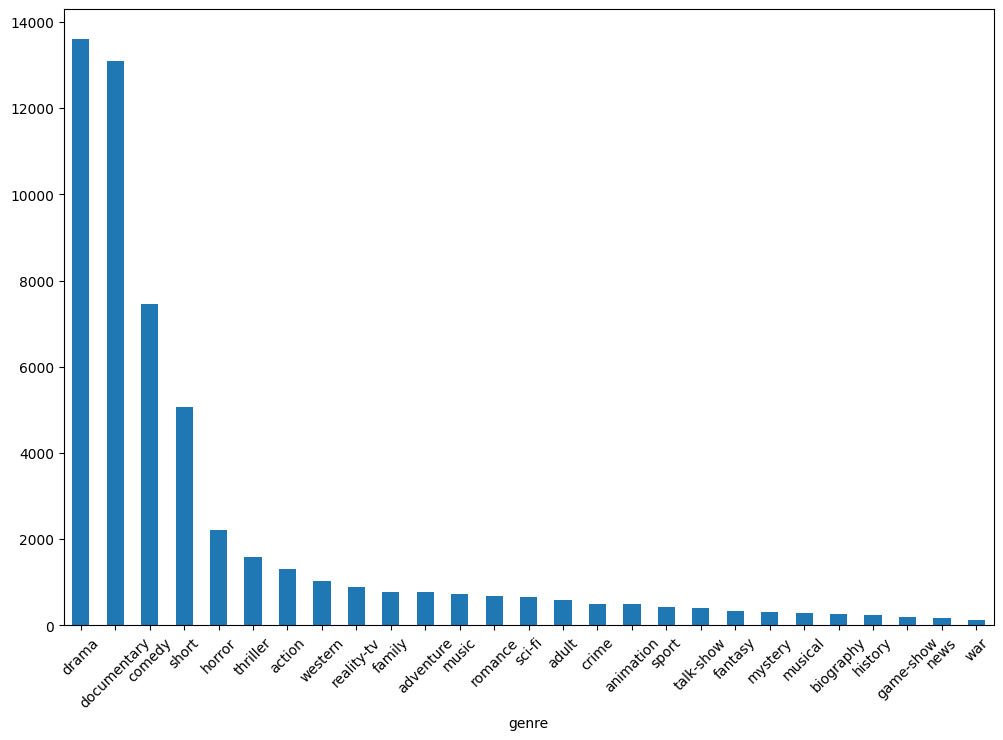

In [16]:
barplot(train_data)

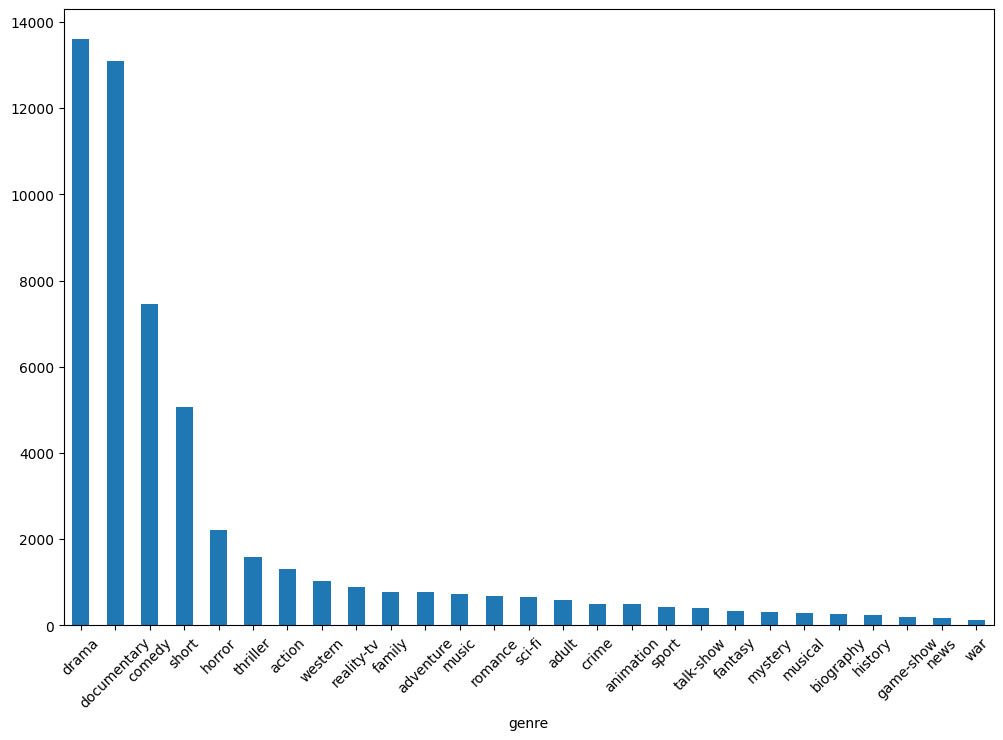

In [17]:
barplot(test_data)

In [3]:
train_data=pd.read_csv('cleaned_train.csv')

In [4]:
test_data =pd.read_csv('cleaned_test.csv')

In [20]:
test_data

,Unnamed: 0,movie,genre,description
0,1,Edgar's Lunch (1998),thriller,brane love life car apart job especi girlfrien...
1,2,La guerra de papá (1977),comedy,spain march quico naughti child three belong w...
2,3,Off the Beaten Track (2010),documentary,one year life albin famili shepherd north tran...
3,4,Meu Amigo Hindu (2015),drama,father die spoken brother year seriou cancer d...
4,5,Er nu zhai (1955),drama,known intern martial art superstar bruce lee a...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,cover multipl genr tale light dark antholog we...
54196,54197,Der letzte Mohikaner (1965),western,alic cora munro attempt find father british of...
54197,54198,Oliver Twink (2007),adult,movi year make oliv twist art dodger fagin lov...
54198,54199,Slipstream (1973),drama,popular mysteri rock mike mallard askew broadc...


In [21]:
train_data.duplicated().sum()

0

In [22]:
test_data.duplicated().sum()

0

In [25]:
from wordcloud import WordCloud
def word_cloud(data):
    all_desc=' '.join(data['description'])
    wordcloud=WordCloud(height=400,width=800,background_color='white').generate(all_desc)
    plt.figure(figsize=(10,5))
    plt.axis('off')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.show()

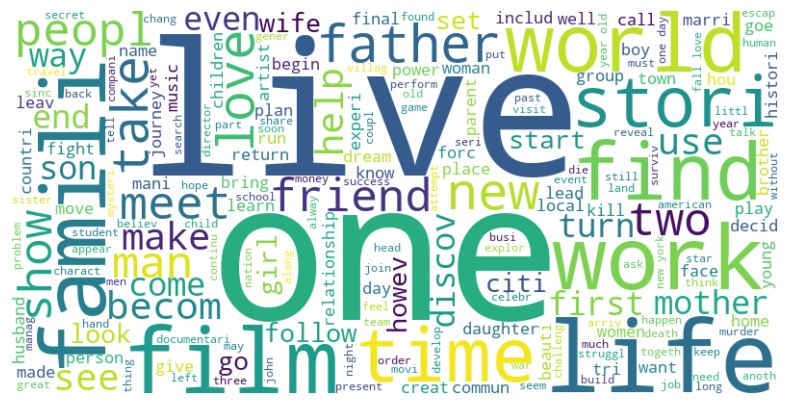

In [26]:
word_cloud(train_data)

In [5]:
x=train_data['description']
y=train_data['genre']
x_test=test_data['description']
y_test=test_data['genre']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
X_train

19253    sex betray seduct manipul addict love hate van...
12261    autist teen toni friendship cameron boy still ...
37143    special examin social ethnic religi econom div...
21965    person narr documentari use bicycl ride work v...
7033     villag policeman artturi sakari reinikainen se...
                               ...                        
11284    david cronenberg canadian director american co...
44732    adan neumann member jewish famili live berlin ...
38158    miranda lesbian photograph guayaquil live buen...
860      enemi profession live chiang sia qv former mer...
15795    fashion design malan breton revisit birth rite...
Name: description, Length: 43371, dtype: object

In [9]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(x_test)
X_valid=vectorizer.transform(X_valid)


In [10]:
X_train

<43371x78298 sparse matrix of type '<class 'numpy.float64'>'
	with 1990552 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [12]:
import warnings
import joblib
warnings.filterwarnings('ignore')
from time import time

In [35]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'Random Forest': RandomForestClassifier(),
}

In [36]:
results={}
model={}
def evl_model(xtrain,ytrain,xtest,ytest):
    for name,mod in models.items():
        print('Model:'+name)
        print('_'*30)
        model[name]=mod
        start=time()
        model[name].fit(xtrain,ytrain)
        y_pred=model[name].predict(xtest)
        end=time()
        results[name] = classification_report(ytest, y_pred, output_dict=True)
        print(classification_report(ytest,y_pred))
        print(f'\nAccuracy score: {accuracy_score(ytest,y_pred)} \nRunning Time: {round((end-start)/60.0,2)}')
        print('*'*30)
    return model,results

In [37]:
# Test using Validation Dataset
l_models,result=evl_model(X_train,y_train,X_valid,y_valid)

Model:Decision Tree
______________________________
               precision    recall  f1-score   support

      action        0.10      0.08      0.09       263
       adult        0.21      0.19      0.20       112
   adventure        0.07      0.06      0.06       139
   animation        0.04      0.03      0.03       104
   biography        0.00      0.00      0.00        61
      comedy        0.31      0.34      0.33      1443
       crime        0.04      0.02      0.03       107
 documentary        0.55      0.59      0.57      2659
       drama        0.41      0.47      0.44      2697
      family        0.09      0.07      0.08       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.48      0.28      0.35        40
     history        0.02      0.02      0.02        45
      horror        0.25      0.26      0.25       431
       music        0.27      0.23      0.25       144
     musical        0.08      0.04      0.05        50
     mystery 

In [13]:
reg_model=LogisticRegression(max_iter=1000)

In [14]:
#Logistic Regression model training

print('Model:Logistic Regression')
print('_'*30)
start=time()
reg_model.fit(X_train,y_train)
y_pred=reg_model.predict(X_valid)
end=time()
#Logistic Regression Validation dataset test
print(classification_report(y_valid,y_pred))
print(f'\nAccuracy score: {accuracy_score(y_valid,y_pred)} \nRunning Time: {round((end-start)/60.0,2)} Min')
print('*'*30)

Model:Logistic Regression
______________________________
               precision    recall  f1-score   support

      action        0.57      0.27      0.37       263
       adult        0.82      0.25      0.38       112
   adventure        0.38      0.12      0.18       139
   animation        0.44      0.04      0.07       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.59      0.56      1443
       crime        0.33      0.02      0.04       107
 documentary        0.67      0.85      0.75      2659
       drama        0.53      0.80      0.64      2697
      family        0.52      0.09      0.16       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.89      0.42      0.58        40
     history        0.00      0.00      0.00        45
      horror        0.64      0.58      0.61       431
       music        0.65      0.46      0.54       144
     musical        0.00      0.00      0.00        50
     my

In [15]:
svm_model=SVC()

In [16]:
#SVM model training
print('Model:SVM')
print('_'*30)
start=time()
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_valid)
end=time()
#SVM Validation dataset test
print(classification_report(y_valid,y_pred))
print(f'\nAccuracy score: {accuracy_score(y_valid,y_pred)} \nRunning Time: {round((end-start)/60.0,2)} Min')
print('*'*30)

Model:SVM
______________________________
               precision    recall  f1-score   support

      action        0.59      0.19      0.29       263
       adult        0.89      0.21      0.35       112
   adventure        0.48      0.11      0.18       139
   animation        0.33      0.01      0.02       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.56      0.54      1443
       crime        0.00      0.00      0.00       107
 documentary        0.65      0.86      0.74      2659
       drama        0.51      0.83      0.63      2697
      family        0.79      0.07      0.13       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.94      0.40      0.56        40
     history        0.00      0.00      0.00        45
      horror        0.67      0.59      0.63       431
       music        0.71      0.33      0.45       144
     musical        0.00      0.00      0.00        50
     mystery        0.0

In [17]:
test_models = {
    'Logistic Regression': reg_model,
    'SVM':svm_model
}

In [18]:
def test_model(xtest,ytest):
    for name,model in test_models.items():
        print('Model:'+name)
        print('_'*30)
        start=time()
        y_pred=model.predict(xtest)
        end=time()
        print(classification_report(ytest,y_pred))
        print(f'\nAccuracy score: {accuracy_score(ytest,y_pred)} \nRunning Time: {round((end-start)/60.0,2)}')
        print('*'*30)

In [19]:
#test dataset test
test_model(X_test,y_test)

Model:Logistic Regression
______________________________
               precision    recall  f1-score   support

      action        0.52      0.27      0.36      1314
       adult        0.63      0.20      0.30       590
   adventure        0.68      0.17      0.27       775
   animation        0.53      0.04      0.08       498
   biography        0.00      0.00      0.00       264
      comedy        0.54      0.59      0.56      7446
       crime        0.39      0.03      0.05       505
 documentary        0.66      0.85      0.74     13096
       drama        0.53      0.79      0.64     13612
      family        0.50      0.07      0.12       783
     fantasy        0.67      0.01      0.02       322
   game-show        0.93      0.48      0.63       193
     history        0.00      0.00      0.00       243
      horror        0.66      0.58      0.62      2204
       music        0.63      0.42      0.50       731
     musical        0.00      0.00      0.00       276
     my

1. **Logistic Regression and SVM Performance**:
   - Both Logistic Regression and SVM show relatively high accuracy (58.29% and 57.57% respectively).
   - Logistic Regression has a more balanced precision, recall, and f1-score across various genres, although some genres are still poorly classified.
   
2. **Naive Bayes Models**:
   - MultinomialNB and BernoulliNB have lower accuracy and f1-scores compared to Logistic Regression and SVM.
   - These models struggle with the nature of dataset, particularly the feature distribution does not suit the assumptions of these models.

3. **Tree-Based Models (Decision Tree, Random Forest, Extra Trees)**:
   - Decision Tree and Random Forest models have lower accuracy, but Extra Trees show a significant improvement (49.26% accuracy).
